B071

Bhavya Singhal

70022000199



In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
train_path='/content/drive/MyDrive/Datasets/v_data/train'
test_path='/content/drive/MyDrive/Datasets/v_data/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, ReLU, Activation, Flatten,Dense
from keras import backend as back

In [ ]:
train_samples=400
test_samples=100


In [ ]:
width,height=224,224

if back.image_data_format()=='channels_first':
  input_sh=(3,width,height)
else:
  input_sh=(width,height,3)

In [ ]:
model=Sequential()

In [ ]:
#Convolutional Layer
model.add(Conv2D(32,(2,2),input_shape=input_sh))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Dense Layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 activation (Activation)     (None, 223, 223, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      4128      
                                                                 
 activation_1 (Activation)   (None, 110, 110, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                    

In [ ]:
train_data=ImageDataGenerator(rescale=1.0/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data=ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_x=train_data.flow_from_directory(train_path,target_size=(width,height),batch_size=16,class_mode='binary')
test_x=test_data.flow_from_directory(test_path,target_size=(width,height),batch_size=16,class_mode='binary')

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
model.fit(train_x,steps_per_epoch=train_samples//16,epochs=10,validation_data=test_x,validation_steps=test_samples//16)
model.save('cnn_large.h5')

Epoch 1/10
25/25 [==============================] - 12s 245ms/step - loss: 0.6919 - accuracy: 0.6250 - val_loss: 0.4330 - val_accuracy: 0.9167
Epoch 2/10
25/25 [==============================] - 5s 207ms/step - loss: 0.4834 - accuracy: 0.7925 - val_loss: 0.2938 - val_accuracy: 0.9167
Epoch 3/10
25/25 [==============================] - 5s 204ms/step - loss: 0.4342 - accuracy: 0.8325 - val_loss: 0.2597 - val_accuracy: 0.8854
Epoch 4/10
25/25 [==============================] - 5s 204ms/step - loss: 0.3845 - accuracy: 0.8425 - val_loss: 0.2962 - val_accuracy: 0.8854
Epoch 5/10
25/25 [==============================] - 5s 206ms/step - loss: 0.3248 - accuracy: 0.8800 - val_loss: 0.2949 - val_accuracy: 0.8542
Epoch 6/10
25/25 [==============================] - 5s 206ms/step - loss: 0.3176 - accuracy: 0.8625 - val_loss: 0.2416 - val_accuracy: 0.8854
Epoch 7/10
25/25 [==============================] - 5s 203ms/step - loss: 0.2963 - accuracy: 0.8950 - val_loss: 0.2744 - val_accuracy: 0.8854
Epoch

In [ ]:
from keras.models import load_model
modell=load_model('cnn_large.h5')

In [ ]:
test_x[6][0][0].shape

(224, 224, 3)

In [ ]:
train_x.class_indices

{'cars': 0, 'planes': 1}

In [ ]:
predict_zero = model.predict(test_x[0][0])

In [ ]:
predict_zero

array([[5.8283353e-01],
       [5.9628469e-01],
       [9.9779749e-01],
       [4.9974474e-06],
       [6.4512682e-03],
       [1.0104867e-01],
       [6.0884067e-05],
       [8.7409174e-01],
       [9.8685616e-01],
       [3.3004227e-04],
       [3.9469328e-06],
       [3.9298991e-03],
       [1.7162362e-01],
       [8.8905990e-01],
       [2.4519709e-03],
       [9.8435587e-01]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt

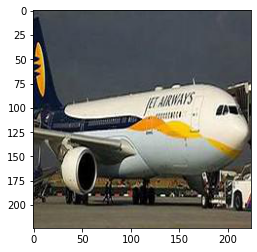

In [ ]:
plt.imshow(test_x[0][0][0])

In [ ]:
test_x[5][0].shape

(16, 224, 224, 3)

Conclusion:

Neural network was created to classify images as either car or airplane, ImageDataGenerator was passed with some parameters to generate samples with variations for training dataset.

Model gives validation accuracy of 0.6562 and correctly predicts 0th image as airplane.